In [1]:
import pandas as pd

In [2]:
# create a data frame for the Hou gene list
#hou = pd.read_csv("..\data\Hou_gene_list.csv")

# read in full marker file as Hou
hou = pd.read_csv("..\data\Hou_gene_list_full.csv")

# drop the empty columns
hou = hou.drop(columns=['Unnamed: 7', 'Unnamed: 8'])
hou.head(10)

,cluster,gene,p_val,avg_logFC,pct.1,pct.2,p_val_adj
0,Superficial Epithelial,si:ch211-207n23.2,0.0,3.783526,0.983,0.256,0.0
1,Superficial Epithelial,zgc:111983,0.0,3.634558,0.987,0.295,0.0
2,Superficial Epithelial,CABZ01088053.1,0.0,3.398964,0.935,0.188,0.0
3,Superficial Epithelial,krt1-19d,0.0,3.254499,0.877,0.123,0.0
4,Superficial Epithelial,si:dkey-247k7.2,0.0,3.182882,0.961,0.117,0.0
5,Superficial Epithelial,cldne,0.0,3.068289,0.982,0.149,0.0
6,Superficial Epithelial,gig2l,0.0,3.018676,0.514,0.165,0.0
7,Superficial Epithelial,si:ch211-157c3.4,0.0,2.870359,0.983,0.268,0.0
8,Superficial Epithelial,CABZ01072255.2,0.0,2.858588,0.876,0.105,0.0
9,Superficial Epithelial,si:ch211-217k17.10,0.0,2.838415,0.886,0.096,0.0


In [3]:
hartig_file = "..\data\Hartig_0dpa_vs_2dpa_ctrl.csv"
file = '0dpa_vs_2dpa_ctrl'
tablename = 'summary_' + file + '.png'
plotname = 'plot_' + file + '.png'

In [10]:
#create a data frame for the Hartig gene list
hartig = pd.read_csv(hartig_file)
hartig.head(10)

DiffExp
downregulated     1102
none             15936
upregulated       1251
Name: DiffExp, dtype: int64

In [5]:
# create a new data frame that contains only those rows that have matching values in both of the original data frames
# based on the 'gene' column in Hou and 'symbol' column in Hartig
merged_gene_list = pd.merge(left=hou, right=hartig, left_on='gene', right_on='Symbol')

# only include the listed columns: gene (Hou), symbol (Hartig), geneID, cluster, diffExp, avg_logFC (Hou), and logFC (Hartig)
merged_gene_list = merged_gene_list.loc[:, ['gene', 'Symbol', 'GeneID', 'cluster', 'DiffExp', 'avg_logFC', 'logFC']]
merged_gene_list.columns = ["gene_hou", "gene_hartig", "GeneID", "cluster", "DiffExp", "logFC_hou", "logFC_hartig"]
merged_gene_list

,gene_hou,gene_hartig,GeneID,cluster,DiffExp,logFC_hou,logFC_hartig
0,si:ch211-207n23.2,si:ch211-207n23.2,ENSDARG00000097157,Superficial Epithelial,none,3.783526,-1.097350
1,zgc:111983,zgc:111983,ENSDARG00000006588,Superficial Epithelial,none,3.634558,-2.242077
2,krt1-19d,krt1-19d,ENSDARG00000023082,Superficial Epithelial,downregulated,3.254499,-3.832954
3,si:dkey-247k7.2,si:dkey-247k7.2,ENSDARG00000103199,Superficial Epithelial,none,3.182882,-1.638649
4,cldne,cldne,ENSDARG00000043128,Superficial Epithelial,none,3.068289,-1.116869
...,...,...,...,...,...,...,...
1044,lsm6,lsm6,ENSDARG00000036995,Mesenchymal,upregulated,0.650483,1.915169
1045,cxcl12a,cxcl12a,ENSDARG00000037116,Mesenchymal,downregulated,0.645527,-1.363379
1046,cirbpb,cirbpb,ENSDARG00000013351,Mesenchymal,none,0.645116,0.255747
1047,rbbp4,rbbp4,ENSDARG00000029058,Mesenchymal,upregulated,0.644503,2.061725


In [9]:
# count how many genes of each type of DiffExp are present in the merged gene list
counts = merged_gene_list.groupby('DiffExp')['DiffExp'].count()
counts

DiffExp
downregulated     99
none             750
upregulated      200
Name: DiffExp, dtype: int64

In [7]:
# create a dataframe of the differentially downregulated genes that exist in both gene lists
downreg = merged_gene_list.loc[merged_gene_list['DiffExp'] == 'downregulated']
downreg

,gene_hou,gene_hartig,GeneID,cluster,DiffExp,logFC_hou,logFC_hartig
44,si:ch73-329n5.3,si:ch73-329n5.3,ENSDARG00000101250,Superficial Epithelial,downregulated,1.627724,-1.703439
62,si:dkey-17e16.17,si:dkey-17e16.17,ENSDARG00000091669,Superficial Epithelial,downregulated,1.409900,-2.198074
69,si:dkey-162h11.2,si:dkey-162h11.2,ENSDARG00000091715,Superficial Epithelial,downregulated,1.355452,-1.800486
125,chac2,chac2,ENSDARG00000055078,Superficial Epithelial,downregulated,0.994066,-1.691571
161,rasgef1ba,rasgef1ba,ENSDARG00000033614,Superficial Epithelial,downregulated,0.829167,-2.049378
179,zgc:153911,zgc:153911,ENSDARG00000002509,Superficial Epithelial,downregulated,0.753107,-1.882475
180,zgc:153911,zgc:153911,ENSDARG00000002509,Intermediate Epithelial,downregulated,0.436577,-1.882475
249,BX004816.1,BX004816.1,ENSDARG00000040497,Mucosal-like,downregulated,0.966946,-1.670798
317,foxc1b,foxc1b,ENSDARG00000055398,Mucosal-like,downregulated,0.371569,-2.657161
338,csrp2,csrp2,ENSDARG00000011961,Mucosal-like,downregulated,0.369314,-2.144320


In [8]:
# create a dataframe of the differentially upregulated that exist in both gene lists
upreg = merged_gene_list.loc[merged_gene_list['DiffExp'] == 'upregulated']
upreg

,gene_hou,gene_hartig,GeneID,cluster,DiffExp,logFC_hou,logFC_hartig
265,si:ch211-71m22.1,si:ch211-71m22.1,ENSDARG00000058638,Mucosal-like,upregulated,0.595282,3.533397
272,tuba1a,tuba1a,ENSDARG00000001889,Mucosal-like,upregulated,1.526873,1.937584
314,cfl1,cfl1,ENSDARG00000021124,Mucosal-like,upregulated,0.918980,2.122197
315,cfl1,cfl1,ENSDARG00000021124,Hematopoietic,upregulated,1.548730,2.122197
316,cfl1,cfl1,ENSDARG00000021124,Mesenchymal,upregulated,1.664437,2.122197
...,...,...,...,...,...,...,...
1040,snrpd3l,snrpd3l,ENSDARG00000076283,Mesenchymal,upregulated,0.658488,1.330759
1041,polr2l,polr2l,ENSDARG00000058349,Mesenchymal,upregulated,0.654256,1.425170
1042,fkbp14,fkbp14,ENSDARG00000040695,Mesenchymal,upregulated,0.654082,2.604373
1044,lsm6,lsm6,ENSDARG00000036995,Mesenchymal,upregulated,0.650483,1.915169


In [9]:
# get a list of all the cell types to then parse the gene list into separate cell cluster dataframes
merged_gene_list.cluster.unique()

array(['Superficial Epithelial', 'Mucosal-like',
       'Intermediate Epithelial', 'Hematopoietic', 'Basal Epithelial',
       'Mesenchymal'], dtype=object)

In [10]:
from statsmodels import robust

In [11]:
superficial = merged_gene_list[merged_gene_list['cluster'] == "Superficial Epithelial"]
superficial_MAD = robust.mad(superficial.logFC_hartig)
ser = pd.Series(superficial_MAD, index = ['MAD'])
superficial_stats = superficial.logFC_hartig.describe()
superficial_stats = superficial_stats.append(ser)
superficial_stats

count    181.000000
mean       0.358908
std        1.169362
min       -2.198074
25%       -0.184014
50%        0.239046
75%        0.925395
max        5.892438
MAD        0.876560
dtype: float64

In [12]:
mucosal = merged_gene_list[merged_gene_list['cluster'] == "Mucosal-like"]
mucosal_MAD = robust.mad(mucosal.logFC_hartig)
ser = pd.Series(mucosal_MAD, index = ['MAD'])
mucosal_stats = mucosal.logFC_hartig.describe()
mucosal_stats = mucosal_stats.append(ser)
mucosal_stats

count    169.000000
mean       0.673996
std        1.283834
min       -2.899781
25%       -0.034188
50%        0.582618
75%        1.324578
max        5.892438
MAD        0.997881
dtype: float64

In [13]:
intermediate = merged_gene_list[merged_gene_list['cluster'] == "Intermediate Epithelial"]
intermediate_MAD = robust.mad(intermediate.logFC_hartig)
ser = pd.Series(intermediate_MAD, index = ['MAD'])
intermediate_stats = intermediate.logFC_hartig.describe()
intermediate_stats = intermediate_stats.append(ser)
intermediate_stats

count    155.000000
mean       0.301556
std        1.229776
min       -2.630101
25%       -0.302307
50%        0.256926
75%        0.916865
max        6.333887
MAD        0.887104
dtype: float64

In [14]:
basal = merged_gene_list[merged_gene_list['cluster'] == "Basal Epithelial"]
basal_MAD = robust.mad(basal.logFC_hartig)
ser = pd.Series(basal_MAD, index = ['MAD'])
basal_stats = basal.logFC_hartig.describe()
basal_stats = basal_stats.append(ser)
basal_stats

count    188.000000
mean      -0.309605
std        0.925998
min       -2.899783
25%       -0.925975
50%       -0.382933
75%        0.321809
max        2.722407
MAD        0.882245
dtype: float64

In [15]:
hema = merged_gene_list[merged_gene_list['cluster'] == "Hematopoietic"]
hema_MAD = robust.mad(hema.logFC_hartig)
ser = pd.Series(hema_MAD, index = ['MAD'])
hema_stats = hema.logFC_hartig.describe()
hema_stats = hema_stats.append(ser)
hema_stats

count    173.000000
mean       1.286951
std        0.859891
min       -0.415335
25%        0.651688
50%        1.209736
75%        1.722775
max        5.094371
MAD        0.803897
dtype: float64

In [16]:
mesenchymal = merged_gene_list[merged_gene_list['cluster'] == "Mesenchymal"]
mesenchymal_MAD = robust.mad(mesenchymal.logFC_hartig)
ser = pd.Series(mesenchymal_MAD, index = ['MAD'])
mesenchymal_stats = mesenchymal.logFC_hartig.describe()
mesenchymal_stats = mesenchymal_stats.append(ser)
mesenchymal_stats

count    183.000000
mean       0.221268
std        1.241070
min       -2.899781
25%       -0.769214
50%        0.050275
75%        1.127409
max        4.011633
MAD        1.426067
dtype: float64

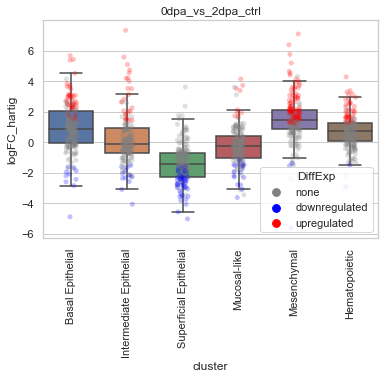

In [7]:
# box plot their distributions

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

ax = sns.boxplot(x="cluster", y="logFC_hartig", data=merged_gene_list, showfliers = False, order=['Basal Epithelial','Intermediate Epithelial','Superficial Epithelial', 'Mucosal-like', 'Mesenchymal', 'Hematopoietic']).set_title(file)
ax = sns.stripplot(x="cluster", y="logFC_hartig", hue="DiffExp", palette=["grey","blue","red"], data=merged_gene_list, color="0.5", alpha=0.25, order=['Basal Epithelial','Intermediate Epithelial','Superficial Epithelial', 'Mucosal-like', 'Mesenchymal', 'Hematopoietic'])
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
#plt.savefig("boxplot/"+plotname, bbox_inches='tight')
plt.show()

In [318]:
summary = pd.DataFrame(superficial_stats)
summary.columns = ["superficial"]
summary['intermediate'] = intermediate_stats
summary['basal'] = basal_stats
summary['mucosal-like'] = mucosal_stats
summary['mesenchymal'] = mesenchymal_stats
summary['hematopoietic'] = hema_stats

In [319]:
summary

,superficial,intermediate,basal,mucosal-like,mesenchymal,hematopoietic
count,181.000000,155.000000,188.000000,169.000000,183.000000,173.000000
mean,0.358908,0.301556,-0.309605,0.673996,0.221268,1.286951
std,1.169362,1.229776,0.925998,1.283834,1.241070,0.859891
min,-2.198074,-2.630101,-2.899783,-2.899781,-2.899781,-0.415335
25%,-0.184014,-0.302307,-0.925975,-0.034188,-0.769214,0.651688
50%,0.239046,0.256926,-0.382933,0.582618,0.050275,1.209736
75%,0.925395,0.916865,0.321809,1.324578,1.127409,1.722775
max,5.892438,6.333887,2.722407,5.892438,4.011633,5.094371
MAD,0.876560,0.887104,0.882245,0.997881,1.426067,0.803897


In [320]:
import dataframe_image as dfi
df_styled = summary.style.background_gradient()
df_styled = summary.style.set_caption(file)
#dfi.export(df_styled, "summary_tables/"+tablename)

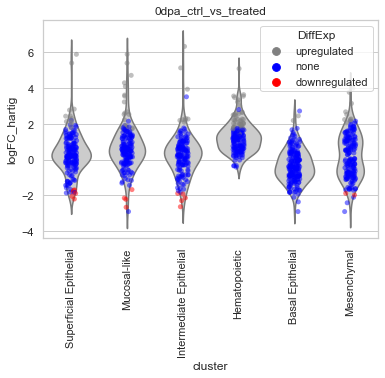

In [321]:
# violin plot with all expression levels labeled
sns.set(style="whitegrid")

ax1 = sns.violinplot(x="cluster", y="logFC_hartig", inner=None, color=".8", data=merged_gene_list).set_title(file)

ax1 = sns.stripplot(x="cluster", y="logFC_hartig", hue="DiffExp", palette=["grey","blue","red"], data=merged_gene_list, alpha=0.5)

v_plotname = "violin_" + plotname
plt.xticks(rotation=90)
#plt.savefig("violin_plot/"+v_plotname, bbox_inches='tight')
plt.show()

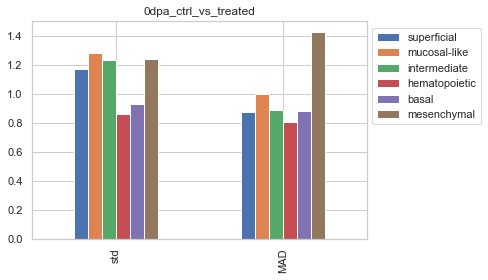

In [322]:
# plot SDs and MAD values

#need to use index values as y-axis label and headers a x-axis labels
table = summary.loc[['std','MAD'],:]
ax = table[['superficial','mucosal-like','intermediate','hematopoietic','basal','mesenchymal']].plot(kind='bar', title=file)
ax = ax.set_ylim(0.0,1.5)
plt.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))
plt.savefig("std_mad_barplot/std_mad_" +plotname, bbox_inches='tight')
plt.show()